# Test Lotka-Voltera simulator

In [1]:
import numpy as np
import corner
from matplotlib import pyplot as plt
%matplotlib inline
import logging

from goldmine.simulators.lotka_volterra import LotkaVolterra

logging.basicConfig(format='%(asctime)s  %(message)s', datefmt='%H:%M')
logging.getLogger().setLevel(logging.DEBUG)

## Run simulation

In [2]:
simulator = LotkaVolterra()

In [56]:
theta0 = simulator.theta_defaults(single_theta=True)[0][0]
print(theta0)
theta1 = (np.array([-4.5,-0.5,0.,-4.5]))
print(theta1)

[-4.60517019 -0.69314718  0.         -4.60517019]
[-4.5 -0.5  0.  -4.5]


In [61]:
x0, log_r_xz0, histories0 = simulator.rvs_ratio(theta0, theta0, theta1, 100, return_histories=True)
x1, log_r_xz1, histories1 = simulator.rvs_ratio(theta1, theta0, theta1, 100, return_histories=True)


19:31  Simulating 100 evolutions for theta = [-4.60517019 -0.69314718  0.         -4.60517019], augmenting with joint ratio between [-4.60517019 -0.69314718  0.         -4.60517019] and [-4.5 -0.5  0.  -4.5]
19:31    Starting sample 1 of 100
19:31    Starting sample 2 of 100
19:31    Starting sample 3 of 100
19:31    Starting sample 4 of 100
19:31    Starting sample 5 of 100
19:31    Starting sample 6 of 100
19:31    Starting sample 7 of 100
19:31    Starting sample 8 of 100
19:31    Starting sample 9 of 100
19:31    Starting sample 10 of 100
19:31    Starting sample 11 of 100
19:31    Starting sample 12 of 100
19:31    Starting sample 13 of 100
19:31    Starting sample 14 of 100
19:31    Starting sample 15 of 100
19:31    Starting sample 16 of 100
19:31    Starting sample 17 of 100
19:31    Starting sample 18 of 100
19:31    Starting sample 19 of 100
19:31    Starting sample 20 of 100
19:32    Starting sample 21 of 100
19:32    Starting sample 22 of 100
19:32    Starting sample 23 of 

## Log r

In [64]:
log_r_xz1

array([-49.7864276 , -43.49539219, -60.60724836, -31.89909786,
       -57.0349133 , -54.79174683, -60.42070679, -48.8024914 ,
       -62.00119983, -54.53693076, -49.08332903, -35.16519452,
       -53.83705103, -43.52971459, -46.30451715, -32.9588551 ,
       -55.66546784, -37.14240262, -62.83338761, -45.51253564,
       -43.53371659, -47.64547737, -47.89583875, -59.98844044,
       -32.60164349, -48.96037891, -41.95713536, -59.55670203,
       -48.90662518, -43.0532685 , -58.62522609, -20.36085103,
       -24.58545785, -46.93365021, -21.41562986, -65.12338107,
       -36.47093024, -44.03541195, -30.9293345 , -32.36392312,
       -35.59026038, -40.17277551, -44.32892091, -25.5018391 ,
       -44.86164729, -51.13492331, -60.1380387 , -58.99029586,
       -60.26662846, -55.02373175, -47.19934518, -52.45120597,
       -43.90349147, -40.04227314, -21.73678494, -38.32315487,
       -49.21398727, -42.48582413, -58.41740108, -40.57410886,
       -32.8539941 , -58.26835277, -56.69834061, -44.96

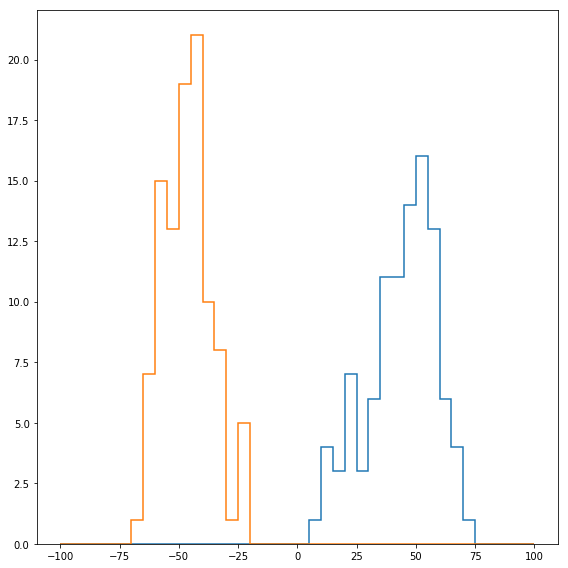

In [65]:
fig = plt.figure(figsize=(8,8))

plt.hist(log_r_xz0, range=(-100.,100.), bins=40, lw=1.5, ls='-', histtype='step')
plt.hist(log_r_xz1, range=(-100.,100.), bins=40, lw=1.5, ls='-', histtype='step')

plt.tight_layout()
plt.show()

## Plot predator and prey evolutions

In [58]:
t = np.linspace(0., 30., histories0[0].shape[0])
                
mean_histories0 = np.median(np.array(histories0), axis=0)
mean_histories1 = np.median(np.array(histories1), axis=0)


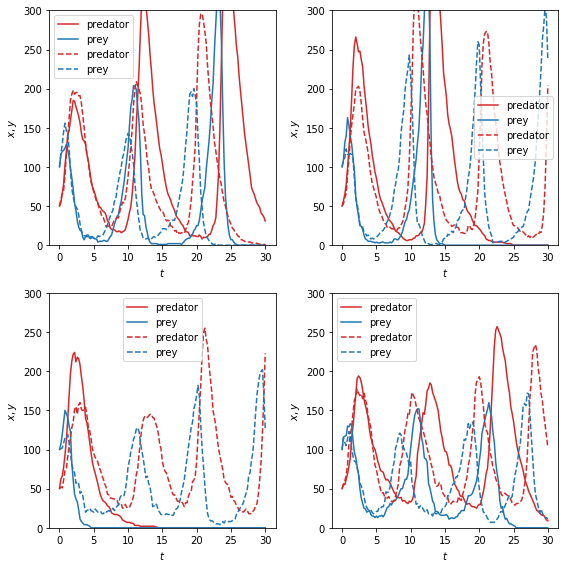

In [59]:
fig = plt.figure(figsize=(8,8))

for i in range(4):

    ax = plt.subplot(2,2,i+1)

    plt.plot(t, histories0[i][:,0], c='C3', lw=1.5, ls='-', label='predator')
    plt.plot(t, histories0[i][:,1], c='C0', lw=1.5, ls='-', label='prey')
    
    plt.plot(t, histories1[i][:,0], c='C3', lw=1.5, ls='--', label='predator')
    plt.plot(t, histories1[i][:,1], c='C0', lw=1.5, ls='--', label='prey')

    plt.legend()

    plt.xlabel(r'$t$')
    plt.ylabel(r'$x, y$')
    plt.ylim(0,300)

plt.tight_layout()
plt.show()

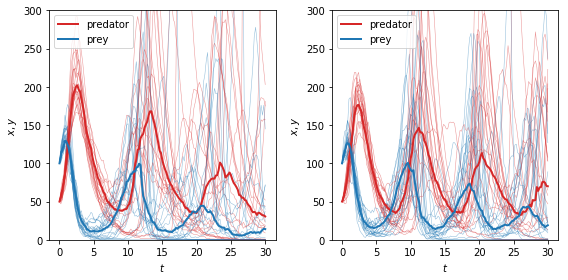

In [60]:
fig = plt.figure(figsize=(8,4))

for panel, (histories, mean_history) in enumerate(zip([histories0, histories1],
                                                    [mean_histories0, mean_histories1])):

    ax = plt.subplot(1,2,panel+1)

    for history in histories[:20]:
        plt.plot(t, history[:,0], c='C3', alpha=0.5, lw=0.5, ls='-')
        plt.plot(t, history[:,1], c='C0', alpha=0.5, lw=0.5, ls='-')
    plt.plot(t, mean_history[:,0], c='C3', lw=2., ls='-', label='predator')
    plt.plot(t, mean_history[:,1], c='C0', lw=2., ls='-', label='prey')

    plt.legend()

    plt.xlabel(r'$t$')
    plt.ylabel(r'$x, y$')
    plt.ylim(0,300)

plt.tight_layout()
plt.show()

## Summary statistics

19:01  Too few points to create valid contours
19:01  Too few points to create valid contours
19:01  Too few points to create valid contours
19:01  Too few points to create valid contours
19:01  Too few points to create valid contours
19:01  Too few points to create valid contours
19:01  Too few points to create valid contours
19:01  Too few points to create valid contours
19:01  Too few points to create valid contours
19:01  Too few points to create valid contours
19:01  Too few points to create valid contours
19:01  Too few points to create valid contours
19:01  Too few points to create valid contours
19:01  Too few points to create valid contours
19:01  Too few points to create valid contours
19:01  Too few points to create valid contours
19:01  Too few points to create valid contours
19:01  Too few points to create valid contours
19:01  Too few points to create valid contours
19:01  Too few points to create valid contours
19:01  Too few points to create valid contours
19:01  Too fe

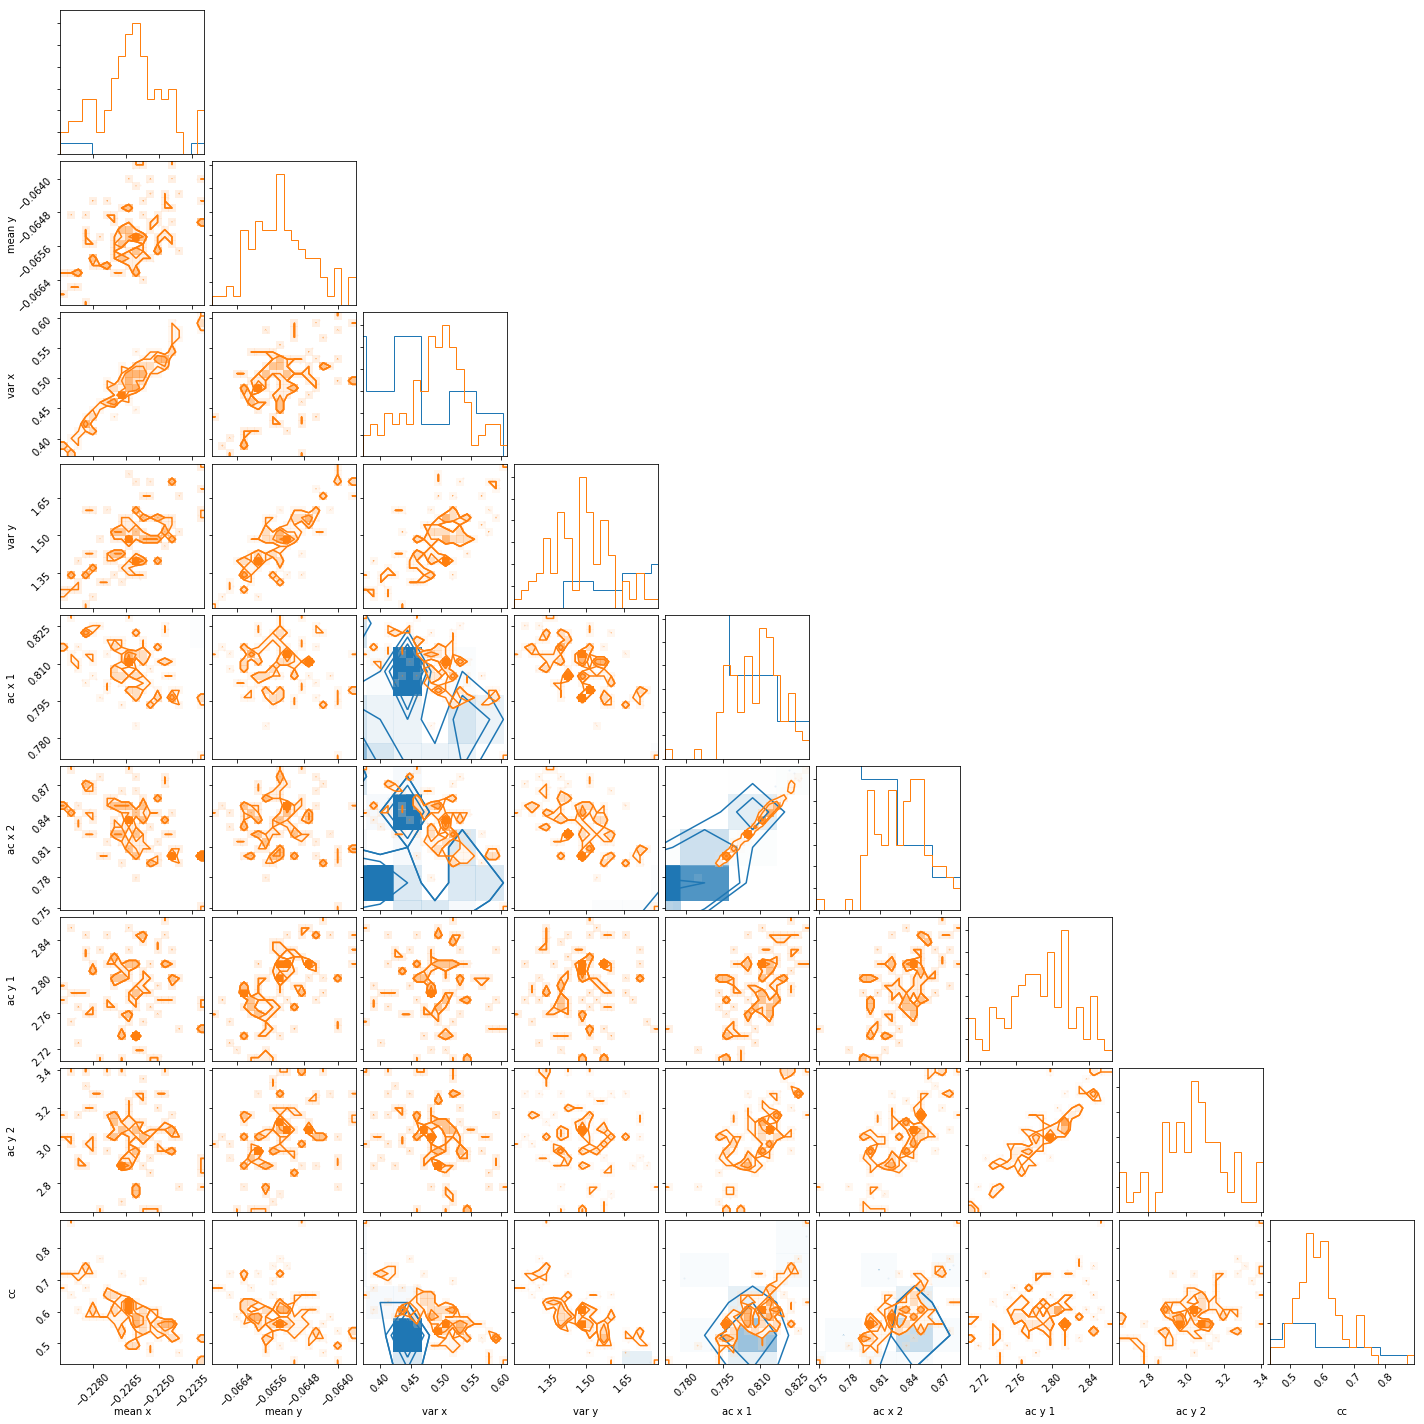

In [18]:
import corner

labels = [r'mean x', r'mean y', r'var x', r'var y', r'ac x 1', r'ac x 2', r'ac y 1', r'ac y 2', 'cc']
ranges = [(-5.,5) for _ in range(9)]

fig = corner.corner(x0, color='C0', labels=labels, ranges=ranges)
_ = corner.corner(x1, color='C1', labels=labels, fig=fig, ranges=ranges)

<function matplotlib.pyplot.plot>

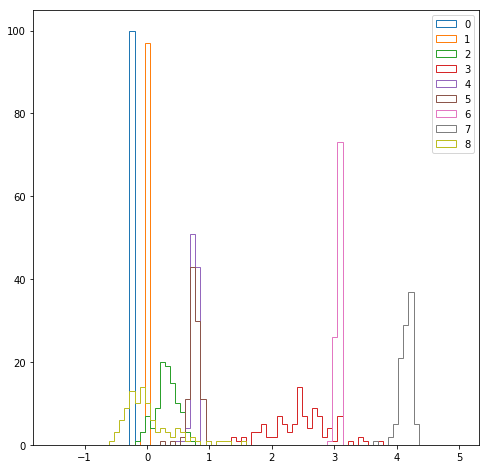

In [19]:
plt.figure(figsize=(8,8))

for i in range(9):
    plt.hist(x0[:,i], range=(-1.5,5.), bins=80, histtype='step', label=str(i))
    
plt.legend()
    
plt.plot

In [6]:
lv = LotkaVolterra()
_, theta1_grid = lv.theta_defaults(single_theta=True)
theta1_grid = theta1_grid[0]
theta1_grid

array([-4.6, -0.5,  0. , -4.6])

In [8]:
theta_grid = lv.theta_grid_default(n_points_per_dim=None)
theta_grid

array([[-5.   , -4.875, -4.75 , -4.625, -4.5  ],
       [-0.8  , -0.675, -0.55 , -0.425, -0.3  ],
       [-0.3  , -0.175, -0.05 ,  0.075,  0.2  ],
       [-5.   , -4.875, -4.75 , -4.625, -4.5  ]])

In [9]:
theta_grid_points = np.meshgrid(*theta_grid, indexing='ij')

In [15]:
theta_grid_points = np.array(theta_grid_points)

In [17]:
theta_grid_points.reshape((4,-1)).T

array([[-5.   , -0.8  , -0.3  , -5.   ],
       [-5.   , -0.8  , -0.3  , -4.875],
       [-5.   , -0.8  , -0.3  , -4.75 ],
       ...,
       [-4.5  , -0.3  ,  0.2  , -4.75 ],
       [-4.5  , -0.3  ,  0.2  , -4.625],
       [-4.5  , -0.3  ,  0.2  , -4.5  ]])